<a href="https://colab.research.google.com/github/Tejas-Chaudhari-007/EE-769-Introduction-to-Machine-Learning/blob/main/Tutorials/EE_769_Tutorial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# General receipe for an ML project
0. Prep: Determine high-level goals, desired output, and relevant input. College data reasonably and ethically.
1. Exploratory data analysis: read files, display values and distributions for each variable, elimiate reduntant or useless variables, add dummy variables (if needed)
2. ML: Shortlist ML models, set up training loops for rigorous validation that avoids overfitting and underfitting for lots of random data splits.
3. Synthesize: Find models that work well for different splits and random initializations; try to note be enamored by fluke models.
4. Test: Try to make sure that data prep process is automated, so that it is deployable. Test only the most robust models.
5. Deplay and monitor.

# Import required packages

In [ ]:
# Import common libraries for data processing and ML

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define class used to print output in different colors
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# Define function used to convert input(str/int/float) to bold for printing later
def bold(input):
  return color.BOLD+str(input)+color.END

Data adapted from the tutorial data sets of the course EE 769 in IIT Bombay.

# Uploading files in Google Colab

In [ ]:
from google.colab import files  # Colab-specific library to load files

# Upload both train and test files
uploaded_files = files.upload()  # Its a dictionary with file names as keys 

# Print name and size of uploaded files for confirmation
for file_name in uploaded_files.keys():
  file_size = len(uploaded_files[file_name])
  print(f'You have uploaded file {bold(file_name)} with {bold(round(file_size/10**6, 3))} MB')

Saving test_data_fetal_cardio.csv to test_data_fetal_cardio.csv
Saving train_data_fetal_cardio.csv to train_data_fetal_cardio.csv
You have uploaded file test_data_fetal_cardio.csv with 0.049 MB
You have uploaded file train_data_fetal_cardio.csv with 0.117 MB


# Exploratory Data Analysis (EDA)

In [ ]:
# Read train and test data sets into pandas dataframe
train_df = pd.read_csv('/content/train_data_fetal_cardio.csv')  # Read the train data
train_df.name = 'Train Data'  # Set name of the train dataframe
test_df = pd.read_csv('/content/test_data_fetal_cardio.csv')
test_df.name = 'Test Data'

print(bold(train_df.name)+':')  # Print the name of the train dataframe
display(train_df)
display(train_df.describe().round(1))  # Numerical basic descriptors rounded till 1 decimal
print(bold(test_df.name)+':')
display(test_df)
display(test_df.describe().round(1))

Train Data:


,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,DR,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Class
0,5,632,132,132,4,0,4,17,2.1,0,10.4,2,0,0,0,130,68,198,6,1,141,136,140,12,0,1
1,177,779,133,133,2,0,5,16,2.1,0,13.4,2,0,0,0,130,68,198,5,1,141,135,138,13,0,1
2,240,953,134,134,1,0,9,29,6.3,0,0.0,6,0,2,0,150,50,200,6,3,71,107,106,215,0,1
3,62,679,122,122,0,0,0,83,0.5,6,15.6,0,0,0,0,68,62,130,0,0,122,122,123,3,1,1
4,181,1192,122,122,0,0,3,86,0.3,6,10.6,0,0,0,0,68,62,130,1,0,122,122,123,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1492,790,1677,140,140,0,0,6,79,0.6,27,6.4,1,0,0,0,26,124,150,1,0,144,141,145,1,1,0
1493,1143,1947,140,140,0,0,4,77,0.7,17,6.0,1,0,0,0,31,124,155,2,0,145,143,145,2,0,0
1494,1576,2596,140,140,1,0,7,79,0.4,20,6.1,0,0,0,0,67,103,170,5,0,153,148,152,4,1,1
1495,1576,3049,140,140,1,0,9,78,0.4,27,7.0,0,0,0,0,66,103,169,6,0,152,147,151,4,1,1


,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,DR,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Class
count,1497.0,1497.0,1497.0,1497.0,1497.0,1497.0,1497.0,1497.0,1497.0,1497.0,1497.0,1497.0,1497.0,1497.0,1497.0,1497.0,1497.0,1497.0,1497.0,1497.0,1497.0,1497.0,1497.0,1497.0,1497.0,1497.0
mean,884.9,1704.7,133.1,133.1,2.7,6.6,3.7,46.8,1.3,9.9,8.2,1.6,0.0,0.1,0.0,70.0,93.8,163.8,4.1,0.3,137.2,134.4,137.9,18.8,0.3,0.5
std,890.8,930.4,9.8,9.8,3.5,34.3,2.8,17.3,0.9,18.5,5.6,2.5,0.1,0.5,0.0,38.9,29.5,17.9,2.9,0.7,16.5,15.7,14.5,29.1,0.6,0.5
min,0.0,287.0,106.0,106.0,0.0,0.0,0.0,12.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,3.0,50.0,122.0,0.0,0.0,60.0,73.0,77.0,0.0,-1.0,0.0
25%,61.0,1000.0,126.0,126.0,0.0,0.0,1.0,32.0,0.7,0.0,4.6,0.0,0.0,0.0,0.0,37.0,67.0,152.0,2.0,0.0,129.0,125.0,129.0,2.0,0.0,0.0
50%,569.0,1304.0,133.0,133.0,1.0,0.0,3.0,48.0,1.2,0.0,7.5,0.0,0.0,0.0,0.0,67.0,95.0,161.0,4.0,0.0,139.0,136.0,139.0,7.0,0.0,0.0
75%,1515.0,2416.0,140.0,140.0,4.0,2.0,5.0,61.0,1.7,11.0,11.0,2.0,0.0,0.0,0.0,99.0,120.0,174.0,6.0,0.0,148.0,145.0,147.0,24.0,1.0,1.0
max,3296.0,3599.0,159.0,159.0,26.0,564.0,23.0,87.0,6.3,91.0,50.7,16.0,1.0,4.0,0.0,176.0,159.0,238.0,18.0,7.0,187.0,180.0,183.0,254.0,1.0,1.0


Test Data:


,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,DR,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Class
0,240,357,120,120,0,0,0,73,0.5,43,2.4,0,0,0,0,64,62,126,2,0,120,137,121,73,1,1
1,411,1192,134,134,2,0,6,16,2.4,0,23.0,2,0,0,0,117,53,170,11,0,137,134,137,13,1,1
2,533,1147,132,132,4,0,5,16,2.4,0,19.9,0,0,0,0,117,53,170,9,0,137,136,138,11,1,0
3,0,953,134,134,1,0,10,26,5.9,0,0.0,9,0,2,0,150,50,200,5,3,76,107,107,170,0,1
4,120,779,122,122,0,0,1,84,0.5,5,13.6,0,0,0,0,68,62,130,0,0,122,122,123,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,1837,2459,136,136,0,3,4,63,2.2,0,5.0,5,0,1,0,85,67,152,6,0,134,116,128,53,1,1
625,455,707,140,140,1,0,1,80,0.2,36,2.2,0,0,0,0,18,140,158,1,0,147,148,149,1,0,0
626,595,1677,140,140,0,0,7,79,0.5,26,7.0,1,0,0,0,21,129,150,1,0,145,142,145,2,1,0
627,2059,2867,140,140,0,0,6,79,0.2,25,7.2,0,0,0,0,40,137,177,4,0,153,150,152,2,0,1


,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,DR,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Class
count,629.0,629.0,629.0,629.0,629.0,629.0,629.0,629.0,629.0,629.0,629.0,629.0,629.0,629.0,629.0,629.0,629.0,629.0,629.0,629.0,629.0,629.0,629.0,629.0,629.0,629.0
mean,863.0,1698.6,133.8,133.8,2.7,8.8,3.7,47.5,1.3,9.7,8.0,1.6,0.0,0.1,0.0,71.5,93.0,164.5,4.1,0.3,138.0,135.0,138.5,18.9,0.3,0.5
std,902.5,933.0,9.9,9.9,3.6,43.1,2.9,16.9,0.9,18.1,5.8,2.5,0.1,0.5,0.0,39.1,29.8,18.0,3.0,0.8,16.2,15.5,14.3,28.8,0.6,0.5
min,0.0,357.0,106.0,106.0,0.0,0.0,0.0,12.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,3.0,50.0,123.0,0.0,0.0,60.0,76.0,79.0,0.0,-1.0,0.0
25%,30.0,1018.0,127.0,127.0,0.0,0.0,1.0,33.0,0.7,0.0,4.5,0.0,0.0,0.0,0.0,37.0,67.0,152.0,2.0,0.0,129.0,125.0,129.0,2.0,0.0,0.0
50%,511.0,1199.0,134.0,134.0,1.0,0.0,3.0,50.0,1.2,0.0,7.2,0.0,0.0,0.0,0.0,70.0,90.0,163.0,3.0,0.0,140.0,136.0,139.0,7.0,0.0,0.0
75%,1544.0,2459.0,142.0,142.0,4.0,2.0,5.0,61.0,1.7,10.0,10.4,3.0,0.0,0.0,0.0,102.0,120.0,175.0,6.0,0.0,148.0,147.0,149.0,24.0,1.0,1.0
max,3125.0,3599.0,160.0,160.0,21.0,489.0,17.0,86.0,7.0,91.0,41.8,14.0,1.0,3.0,0.0,180.0,158.0,238.0,16.0,10.0,186.0,182.0,186.0,269.0,1.0,1.0


Obervations:
1. Column 'DR' looks empy.
2. Number of columns is same in train and test data.
3. Notice how different columns have different scales (range, min, max)

Next, we shoud:
1. Check the data type of each column.
2. Check for missing values (NA).
3. Plot the histograms o fthe columns to if there is a good spread (If the variance is too low then it does not help us).

In [ ]:
# Get data types of columns in training and testing data
print('Data types of columns in training data:')
display(train_df.dtypes)
print('Data types of columns in testing data:')
display(test_df.dtypes)

Data types of columns in training data:


b             int64
e             int64
LBE           int64
LB            int64
AC            int64
FM            int64
UC            int64
ASTV          int64
MSTV        float64
ALTV          int64
MLTV        float64
DL            int64
DS            int64
DP            int64
DR            int64
Width         int64
Min           int64
Max           int64
Nmax          int64
Nzeros        int64
Mode          int64
Mean          int64
Median        int64
Variance      int64
Tendency      int64
Class         int64
dtype: object

Data types of columns in testing data:


b             int64
e             int64
LBE           int64
LB            int64
AC            int64
FM            int64
UC            int64
ASTV          int64
MSTV        float64
ALTV          int64
MLTV        float64
DL            int64
DS            int64
DP            int64
DR            int64
Width         int64
Min           int64
Max           int64
Nmax          int64
Nzeros        int64
Mode          int64
Mean          int64
Median        int64
Variance      int64
Tendency      int64
Class         int64
dtype: object

Observations:
1. Good! All dataypes are int or float, i.e., numerical.
2. If we had any categorical variables then we would have to do one-hot encoding (i.e. to convert them to dummy numbers)

Note:
1. We can consider int columns to be numerical (i.e. continuous) as long as it has large enough unique values (roughly larger than about 10).

Next, we have to:
1. Check if the features (i.e. the columns) have diverse values


In [ ]:
# Check unique values and null entries
for column_name in train_df.columns.values:  # Iterate over each column
  # Store the required values in variables
  unique_values_list = pd.unique(train_df[column_name])  # Store the list of unique values in the column
  data_type = train_df[column_name].dtypes
  number_of_na_values = train_df[column_name].isna().sum()

  # Print the required output
  print(f'{bold(column_name)} is a type of {bold(data_type)}, has {bold(len(unique_values_list))} unique values,\
   and {bold(number_of_na_values)} NaN entries')
  
  # Print unique values list if the columns has small number (less than 10) of unique values
  if len(unique_values_list) < 10:
      print(f'The unique values are {bold(unique_values_list)}')

b is a type of int64, has 794 unique values,   and 0 NaN entries
e is a type of int64, has 881 unique values,   and 0 NaN entries
LBE is a type of int64, has 47 unique values,   and 0 NaN entries
LB is a type of int64, has 47 unique values,   and 0 NaN entries
AC is a type of int64, has 20 unique values,   and 0 NaN entries
FM is a type of int64, has 76 unique values,   and 0 NaN entries
UC is a type of int64, has 18 unique values,   and 0 NaN entries
ASTV is a type of int64, has 75 unique values,   and 0 NaN entries
MSTV is a type of float64, has 53 unique values,   and 0 NaN entries
ALTV is a type of int64, has 87 unique values,   and 0 NaN entries
MLTV is a type of float64, has 231 unique values,   and 0 NaN entries
DL is a type of int64, has 15 unique values,   and 0 NaN entries
DS is a type of int64, has 2 unique values,   and 0 NaN entries
The unique values are [0 1]
DP is a type of int64, has 5 unique values,   and 0 NaN entries
The unique values are [0 2 1 3 4]
DR is a type of 

Obervations:
1. None of the columns have any null entries (If there are too many null entries in a column then we may drop it).
2. There are few columns with very less number of unique values, however for the simplification we will consider them as continuous (rather than discrete).
3. Some of the predictor varaibles seem to have lots of unique values, i.e., these can be treated as continuous variables.
4. Variable 'DR' has only one uniqe value, and hence no variable. So we will eliminate it later.

Next:
1. Plot their distributions to visualize problems

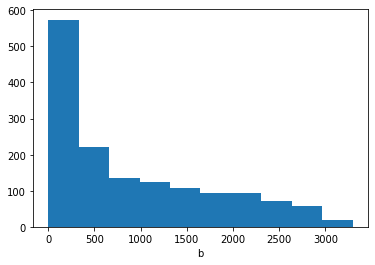

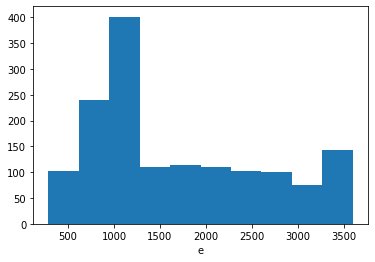

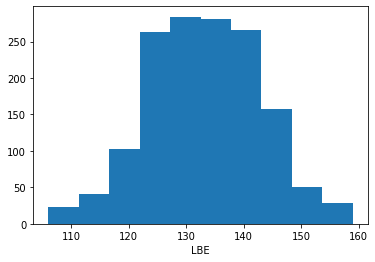

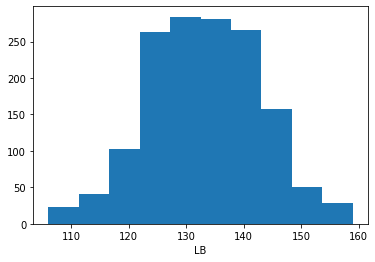

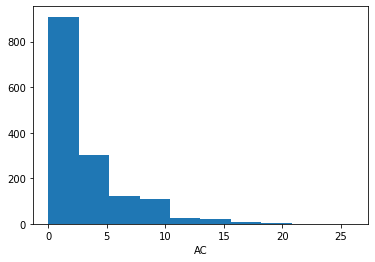

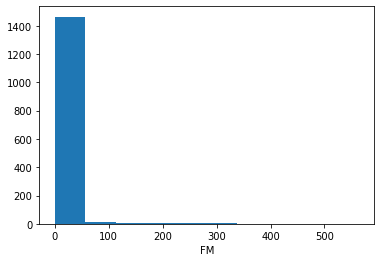

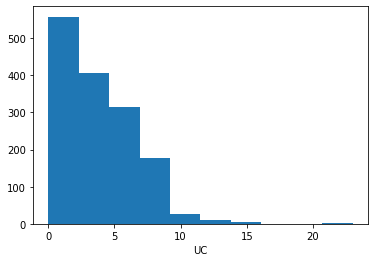

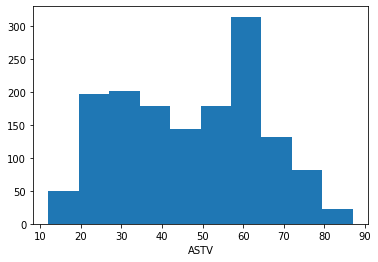

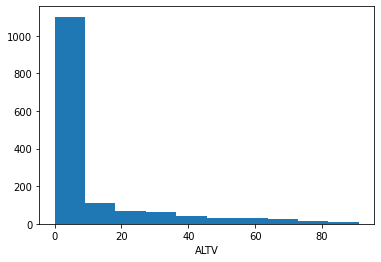

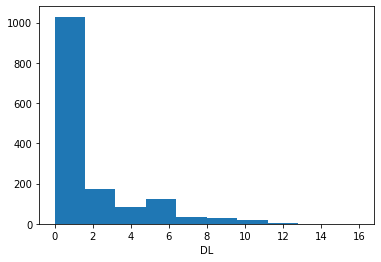

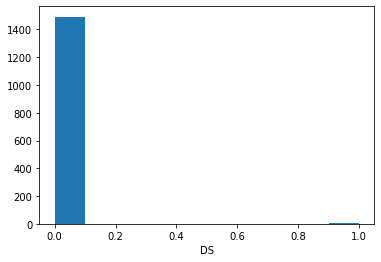

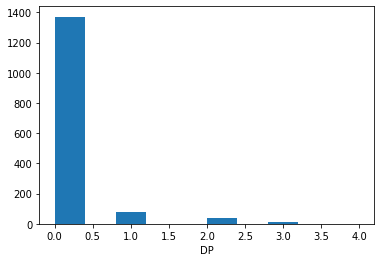

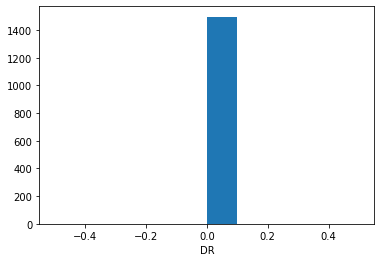

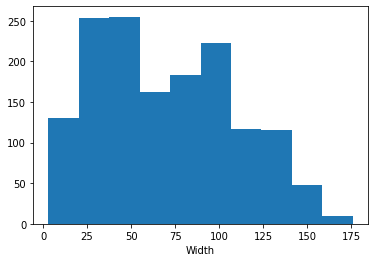

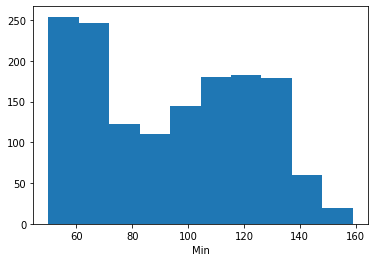

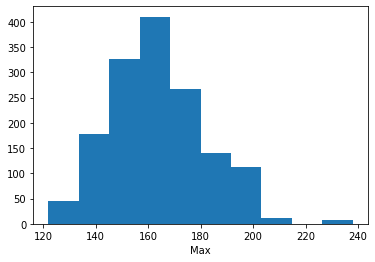

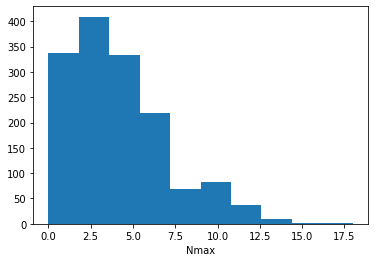

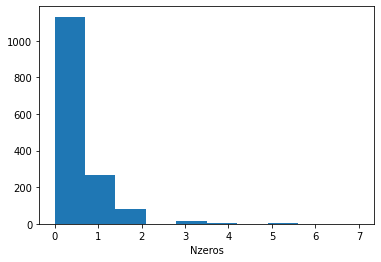

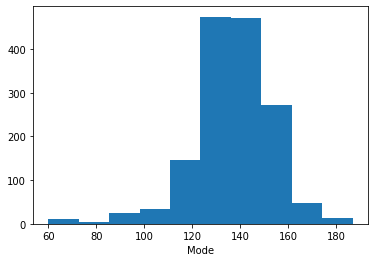

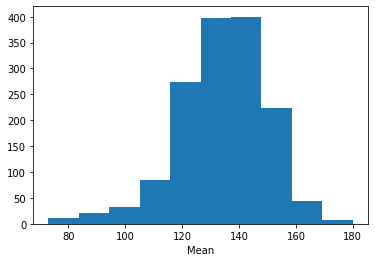

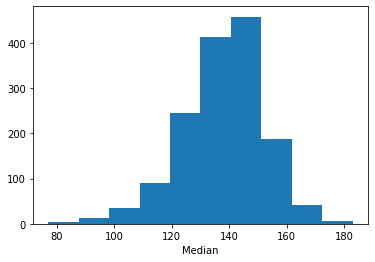

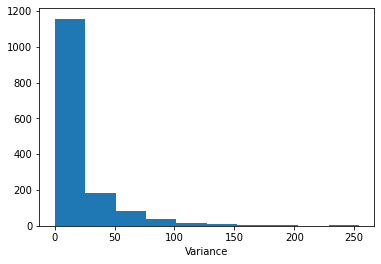

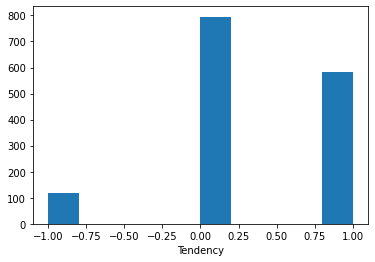

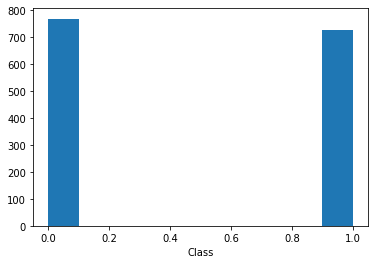

In [ ]:
# Plot histograms for discrete variables

for column_name in train_df.columns.values:  # Iterate over all columns
  # Plot only if the values are integers (i.e. discrete)
  if(train_df[column_name].dtypes == 'int64') | (train_df[column_name].dtypes == 'object'): # '|' is same as 'or'
    plt.hist(train_df[column_name])
    plt.xlabel(column_name)
    plt.show()


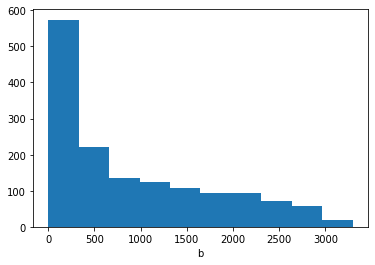

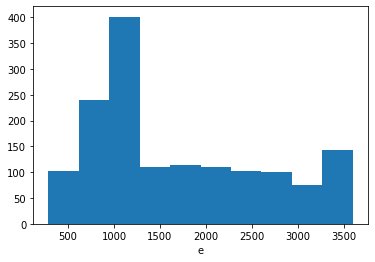

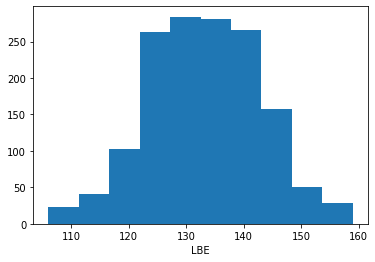

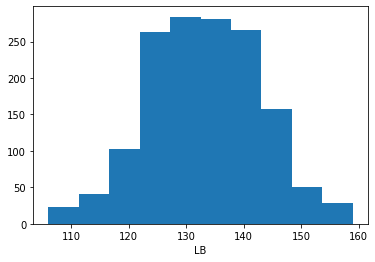

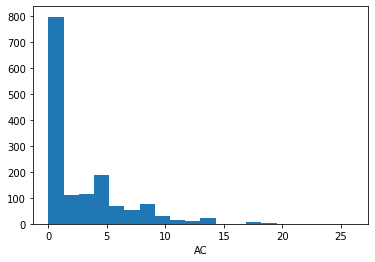

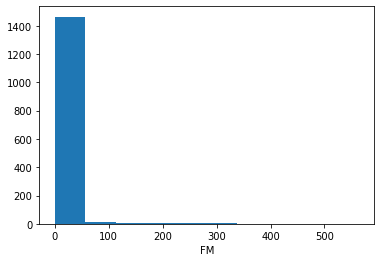

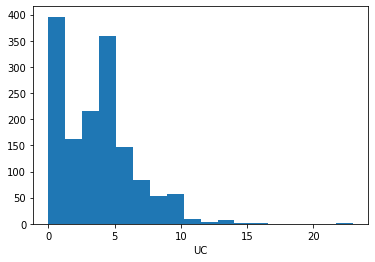

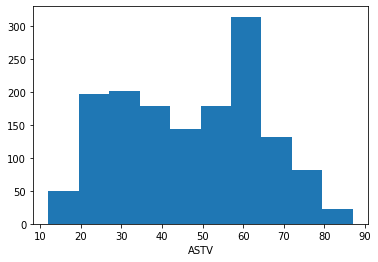

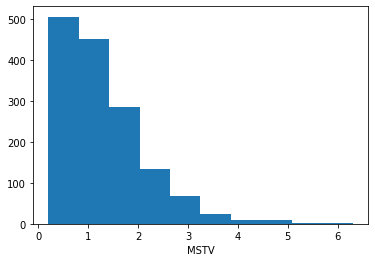

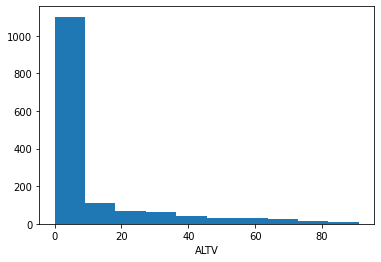

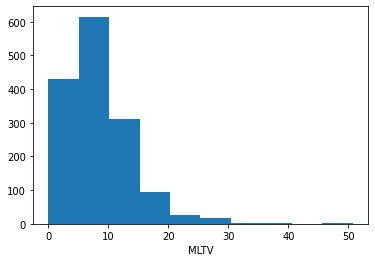

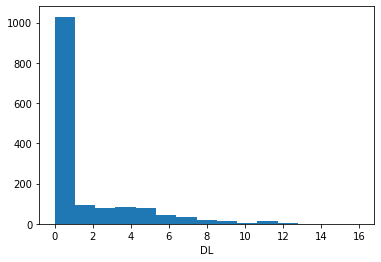

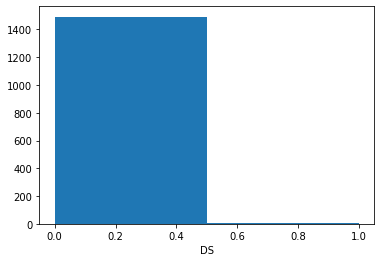

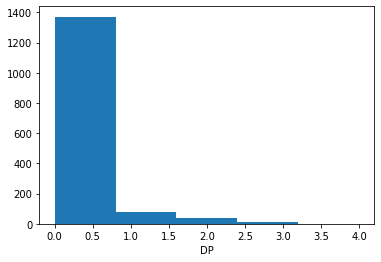

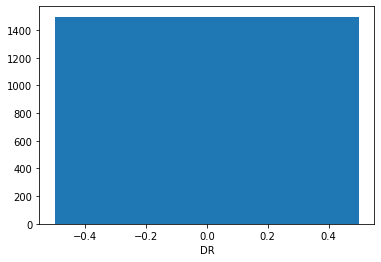

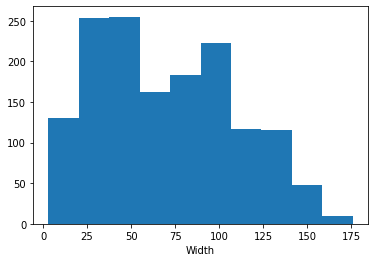

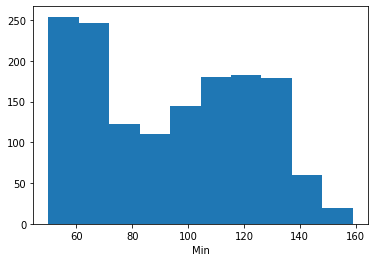

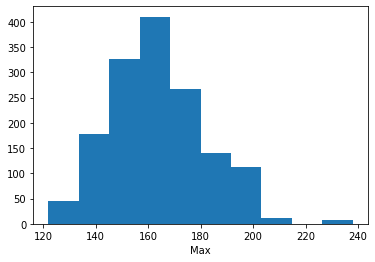

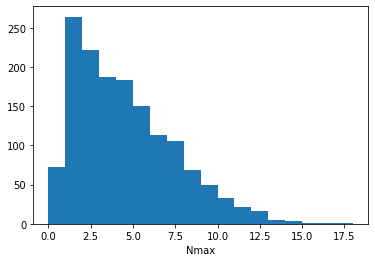

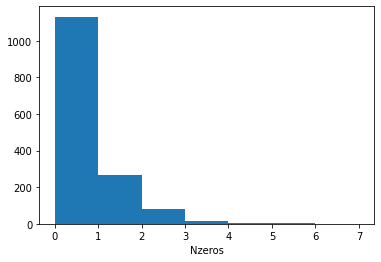

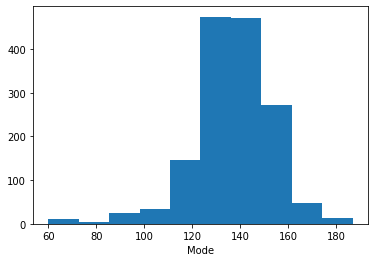

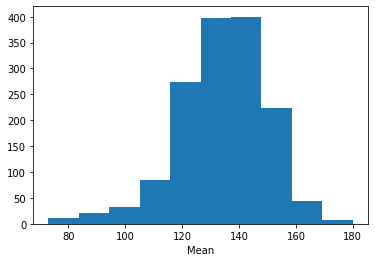

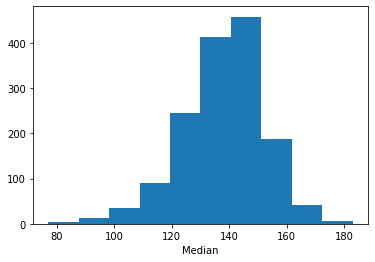

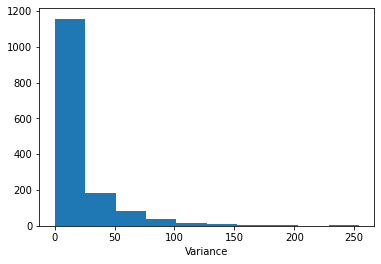

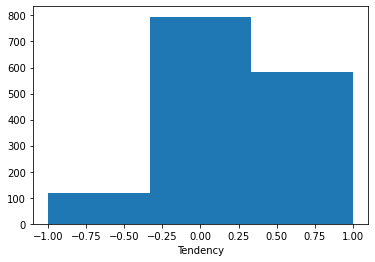

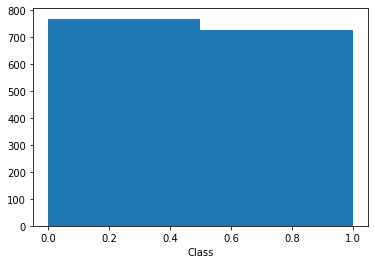

In [ ]:
# Plot historgrams for continuous variables

for column_name in train_df.columns.values:
  unique_values_list = pd.unique(train_df[column_name])
  # Check if the values are integers or float and if then unique values in the column are large enough for it to be considered as continuous
  if (train_df[column_name].dtypes == 'int64') or (train_df[column_name].dtypes == 'float64'):
    plt.hist(train_df[column_name], bins=10 if len(unique_values_list) > 20 else len(unique_values_list))
    plt.xlabel(column_name)
    plt.show()

Observations:
1. All obervations except DR seems to be spread well. Drop DR.

Note:
1. Sometimes we drop the variables which are highly skewed. However in this case we won't do this.
2. Drop unvarying data column from both train and test
3. Dropping this is necessary for computing correlations.
4. Else, there will be an error. (As variance of the variables come in the denominator of the formula for correlation coefficient)

Next:
1. Drop DR


In [ ]:
# Dropping DR

train_df = train_df.drop(['DR'], axis=1)
test_df = test_df.drop(['DR'], axis=1)

Next:
1. Plot pair-wise scatter plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f455da9be90>,
      dtype=object)

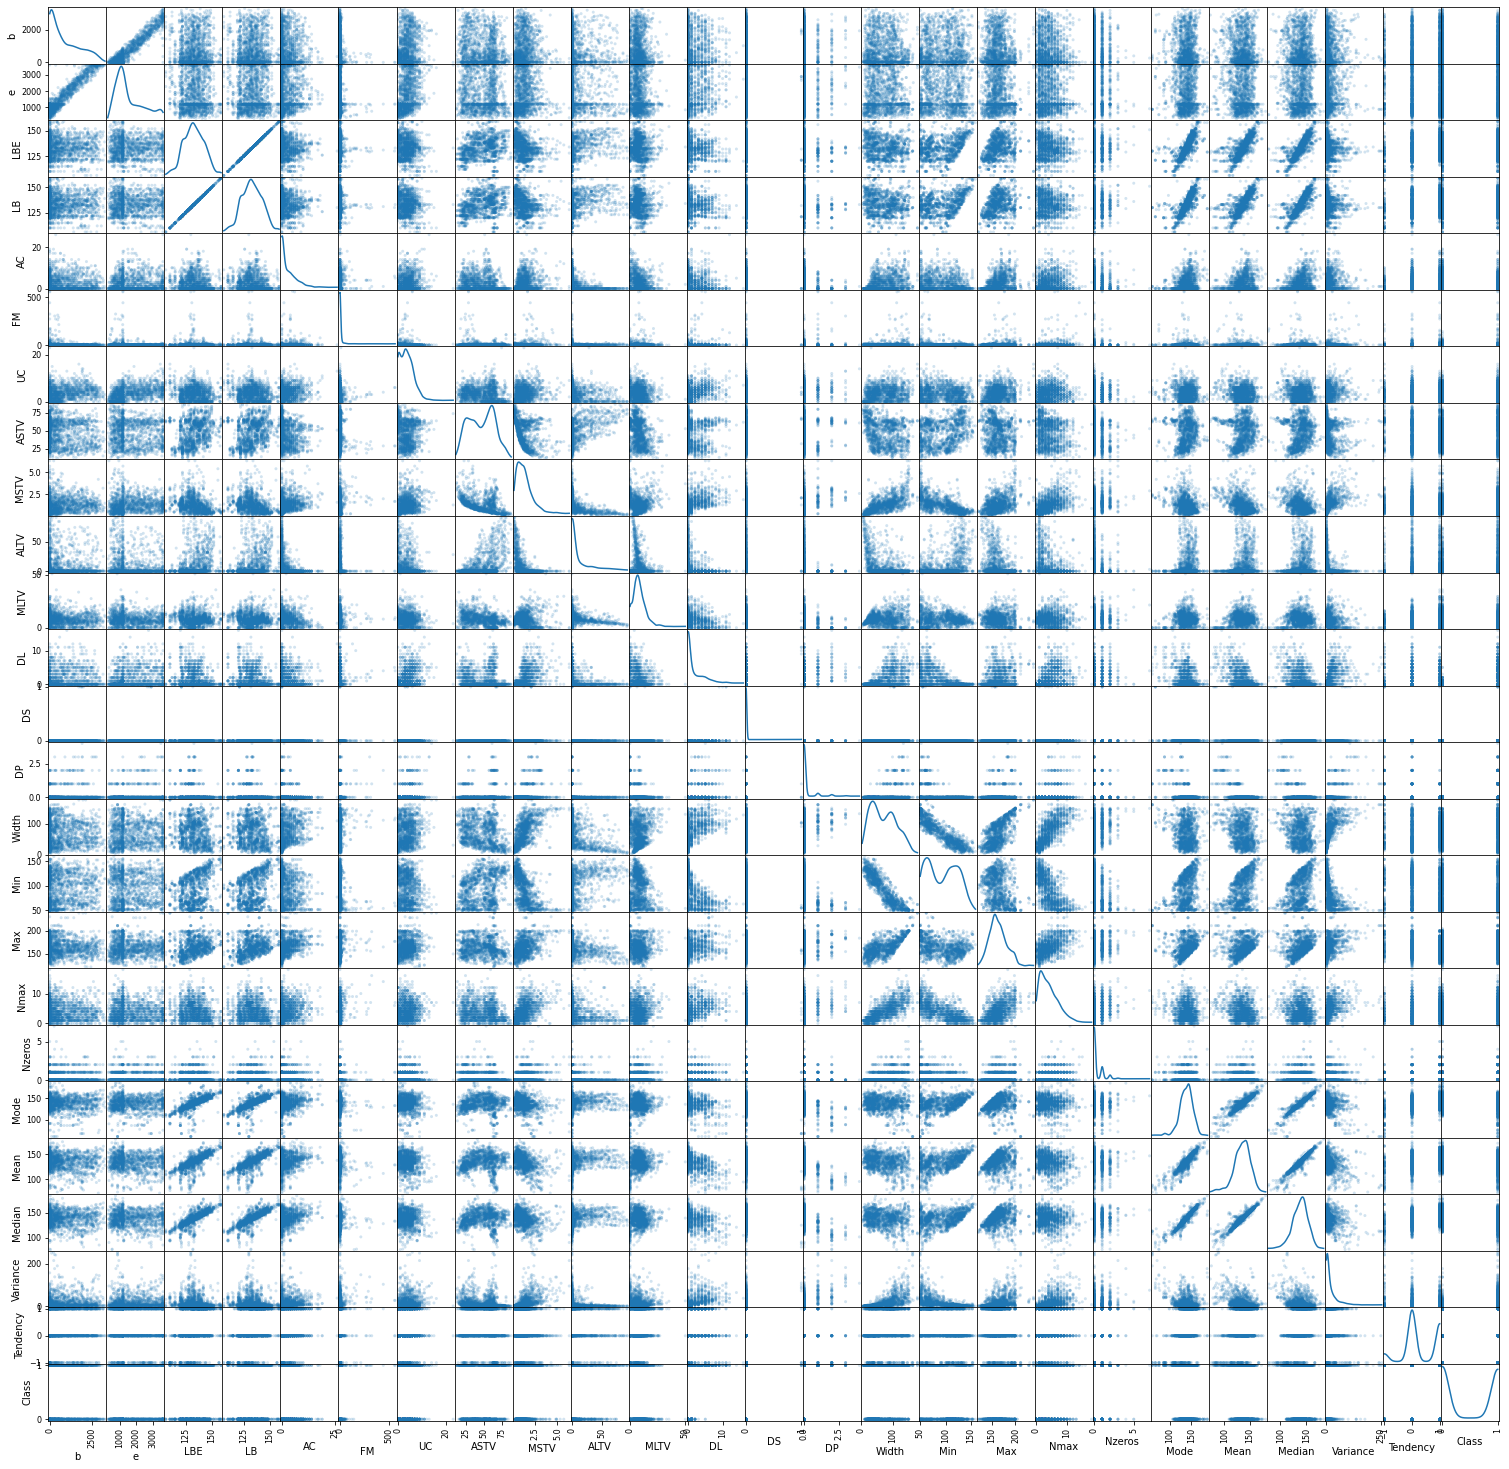

In [ ]:
# We can plot pair-wise scatter matrices (lazy coding)

pd.plotting.scatter_matrix(train_df, alpha=0.2, figsize=(26, 26), diagonal='kde') # 'kde' is kernel density estimation
# 'alpha' argument is the 'opacitty'
# 'kde' is the estimation for the smoothened histograms

Obervations:
1. Variable paris whose scatter look like straght line or thin curves are correlated. Some of those should be eliminated.
2. Variables whose scatter show multiple vertical or horizontal lines are heavily quantized.
3. For clustering, we are interested in distinct point-groups in scatter plots. Sometimes it is obvious from these scatter plots.

Next:
1. Plot the correlation matrix to see it better.

Note:
1. A perfect negative corelation is also a perfect correlation. So, we are interested in abs value.

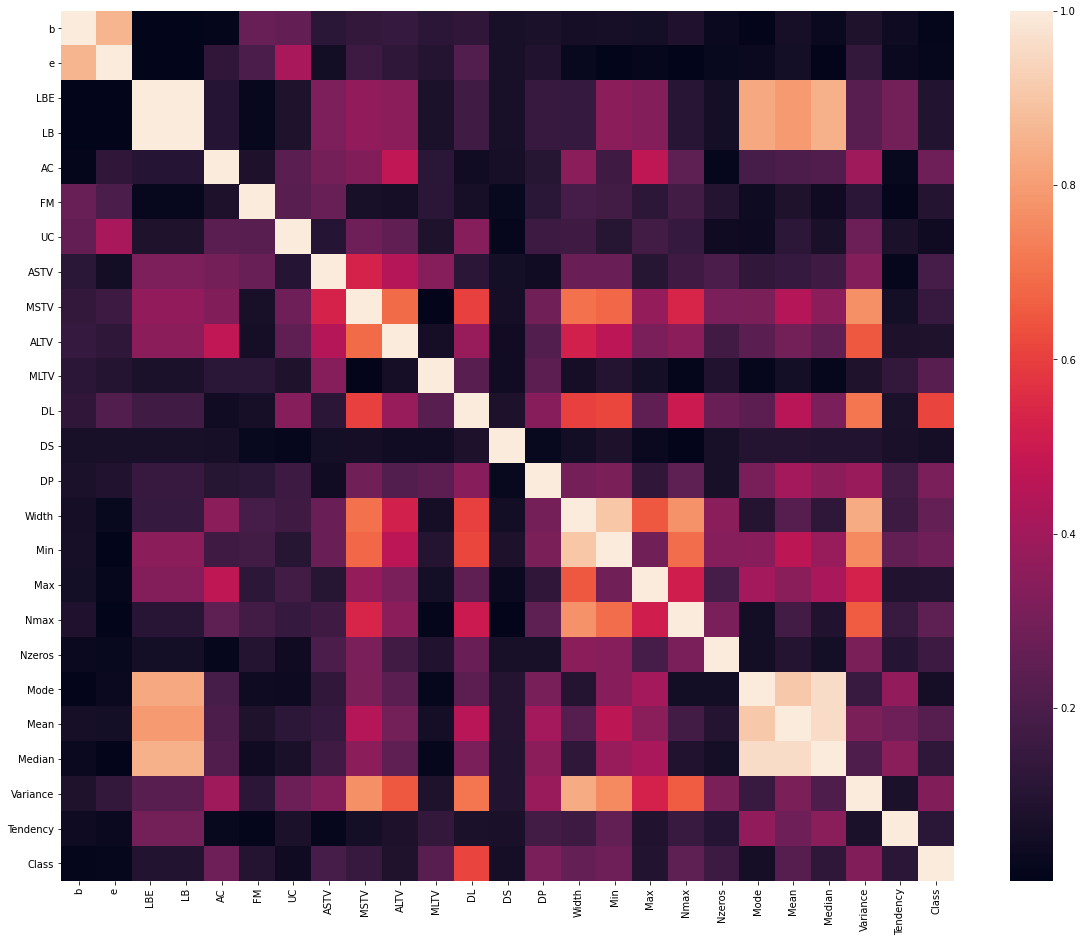

In [ ]:
correlation_matrix = train_df.corr(method='spearman')  # Use spearman for non-linear/monotonicity
fig, ax = plt.subplots(figsize=(20, 16))
sns.heatmap(abs(correlation_matrix), annot=False) # Show absolute value
plt.show()

Obervations:
1. There some redundant variables which we need to drop later.
2. 2x2 matrix of LBE and LB shows high correlation so we can drop one of the 2 variables.
3. 3x3 matrix of mode, mean and median show high correlation so we can drop 2 of the 3 features.

Next:
1. See if the distribution of each variables varies by class
2. We will check spread of each variable for class 0 and class 1 and if there is difference in the 2 then that variable is predictive of the class. If the spread of the variable is similar for both classes then it is not predictive of the class.
3. Rough logic - if we give similar inputs for different outputs then ML model won't be able to relate the inputs to the outputs properly. Its similar to saying we can not have one-to-many function.
3. To check the spread we use box plot


In [ ]:
# Plot boxplots for both classes corresponding to each column
for column_name in train_df.columns.values:
  train_df.boxplot(by='Class', column=column_name, grid=False)

NameError: ignored

Obervations:
1. Spread of B is similar for the 2 classes. Hence it won't be informative for the class. 
2. Looks like there are discriminatory variables with non-overlapping side-by-side boxplots, such as 'variance'.
3. Variables B, LBE, LB, UC, MLTV, and Tendency can be droped as they have similar spread for both classes.
4. Variables FM, DS and DP can be dropped as they have zero interquartile range (IQR/midspread) for both classes. IQR is a measure of statistical dispersion.

Note:
1. We may ignore the last box-plot of class.


# Data Preparation
1. Eliminate useless columns(reduntant/correlated, unvarying(e.g. DR), or lots of missing entries(
2. Convert discrete variables into one-hot-bit(dummy) numbers. We don't have these in this data.
3. Standardize ranges so that no variable has a disproportionate sway on the model. Models like SVM, NN, logistic regression are sensitive to scaling and require all columns to be in the same scale. RF is insensitive to scaling and do not require scaling. If a feature has a variance that is orders of magnitude larger that others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.
4. A variable with very high variance, even if it is not very predictive, might dominate on the solution. So to make the vairables fair we standardize them. Usually we make same standardization transformation on trianing and testing data. 

In [ ]:
# Standardize the data (shift and scale so that columns have zero mean and unit variance)
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()  # For data standardization

# Specify the columns which we want to retain
cols_to_retain = ['e', 'AC', 'ASTV', 'MSTV', 'ALTV', 'DL', 'Width', 'Max', 'Nmax', 'Nzeros', 'Median', 'Variance']

# Computes and stores mean and standard deviation to be used on later data using 'transform'
scaler.fit(train_df[cols_to_retain])  
train_X = pd.DataFrame(scaler.transform(train_df[cols_to_retain]))
train_Y = pd.DataFrame(train_df['Class'])
display(train_X)
print(train_X.mean())
print(train_X.std())

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.153351,0.363067,-1.721155,0.867792,-0.535016,0.174268,1.543261,1.909796,0.657924,0.988026,0.142225,-0.232743
1,-0.995294,-0.201914,-1.778947,0.867792,-0.535016,0.174268,1.543261,1.909796,0.318533,0.988026,0.004686,-0.198342
2,-0.808206,-0.484404,-1.027659,5.645513,-0.535016,1.777213,2.057705,2.021518,0.657924,3.943222,-2.195938,6.750730
3,-1.102816,-0.766894,2.093074,-0.952292,-0.210911,-0.627205,-0.051513,-1.888750,-1.378422,-0.489572,-1.026857,-0.542356
4,-0.551229,-0.766894,2.266448,-1.179802,-0.210911,-0.627205,-0.051513,-1.888750,-1.039031,-0.489572,-1.026857,-0.611158
...,...,...,...,...,...,...,...,...,...,...,...,...
1492,-0.029748,-0.766894,1.861908,-0.838537,0.923460,-0.226468,-1.131844,-0.771531,-1.039031,-0.489572,0.486072,-0.611158
1493,0.260560,-0.766894,1.746326,-0.724781,0.383283,-0.226468,-1.003233,-0.492226,-0.699640,-0.489572,0.486072,-0.576757
1494,0.958377,-0.484404,1.861908,-1.066047,0.545336,-0.627205,-0.077235,0.345689,0.318533,-0.489572,0.967459,-0.507954
1495,1.445451,-0.484404,1.804117,-1.066047,0.923460,-0.627205,-0.102957,0.289828,0.657924,-0.489572,0.898689,-0.507954


0    -2.303509e-16
1    -1.085749e-15
2     2.060254e-16
3     1.860013e-16
4     2.140350e-15
5     6.431432e-16
6    -5.747648e-17
7     6.174086e-17
8     3.930649e-17
9    -1.915635e-16
10    1.072548e-15
11   -4.016679e-16
dtype: float64
0     1.000334
1     1.000334
2     1.000334
3     1.000334
4     1.000334
5     1.000334
6     1.000334
7     1.000334
8     1.000334
9     1.000334
10    1.000334
11    1.000334
dtype: float64


Obervations:
1. All the means are ~ 0
2. All the standard deviations are ~ 1

Next:
Plot correlation matrix heatmap of X in training data

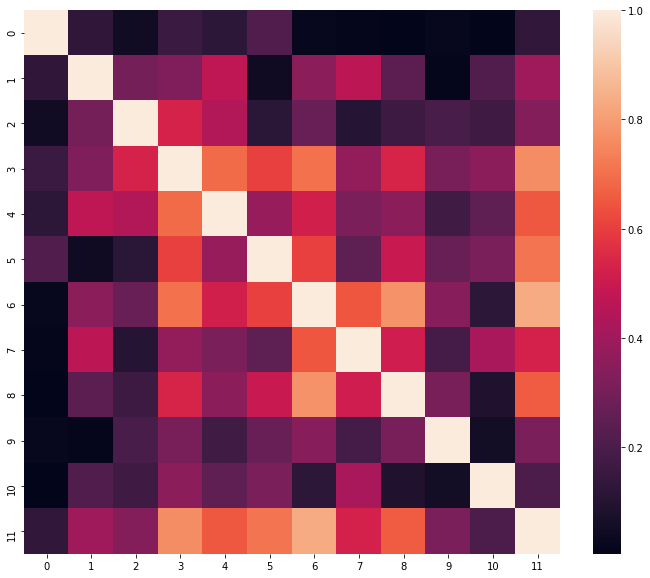

In [ ]:
# Compute and store correlation matrix
corr_matrix = train_X.corr(method='spearman')

# Plot the correlation matrix heatmap
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(abs(corr_matrix), annot=False)
plt.show()


Observations:
1. Variables selected seem uncorrelated to each other.

Next:
Transform test data with the same automation that worked for the training data.

Warning!:
Do not re-fit scaler and do not introduce new preprocessing steps. Otherwise, your testing can not be automated.

Warning!:
Do not take previous warning as sacrosanct. There are situations where the test data needs to be re-standardized, such as when there is a covariate shift due to use of different equipment(that has its own mean and variance) to collect data for testing than training. Howeverm this is not the case for this data.

Note:
When we want the model to be robust to the changes in the way the test data is collected then we will re-estimate the mean and standard deviation for the standardization.

In [ ]:
# Standardize test data using the same scaler that was fitted on training.

test_X = pd.DataFrame(scaler.transform(test_df[cols_to_retain]))
test_Y = pd.DataFrame(test_df['Class'])

# Display the test_X
display(test_X)
print(test_X.mean())
print(test_X.std())

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.449036,-0.766894,1.515160,-0.952292,1.787742,-0.627205,-0.154402,-2.112194,-0.699640,-0.489572,-1.164396,1.865739
1,-0.551229,-0.201914,-1.778947,1.209058,-0.535016,0.174268,1.208873,0.345689,2.354879,-0.489572,-0.064084,-0.198342
2,-0.599614,0.363067,-1.778947,1.209058,-0.535016,-0.627205,1.208873,0.345689,1.676097,-0.489572,0.004686,-0.267145
3,-0.808206,-0.484404,-1.201033,5.190492,-0.535016,2.979422,2.057705,2.021518,0.318533,3.943222,-2.127169,5.202670
4,-0.995294,-0.766894,2.150865,-0.952292,-0.264928,-0.627205,-0.051513,-1.888750,-1.378422,-0.489572,-1.026857,-0.542356
...,...,...,...,...,...,...,...,...,...,...,...,...
624,0.811072,-0.766894,0.937247,0.981547,-0.535016,1.376477,0.385764,-0.659809,0.657924,-0.489572,-0.683009,1.177712
625,-1.072710,-0.484404,1.919700,-1.293558,1.409619,-0.627205,-1.337622,-0.324643,-1.039031,-0.489572,0.761150,-0.611158
626,-0.029748,-0.766894,1.861908,-0.952292,0.869442,-0.226468,-1.260455,-0.771531,-1.039031,-0.489572,0.486072,-0.576757
627,1.249761,-0.766894,1.861908,-1.293558,0.815425,-0.627205,-0.771734,0.736715,-0.020858,-0.489572,0.967459,-0.576757


0    -0.006506
1     0.007372
2     0.040608
3    -0.016750
4    -0.010556
5     0.006711
6     0.038535
7     0.040363
8     0.007740
9    -0.038540
10    0.036829
11    0.004949
dtype: float64
0     1.003166
1     1.019828
2     0.977567
3     1.015830
4     0.978671
5     1.005158
6     1.006315
7     1.007459
8     1.003341
9     1.139356
10    0.982012
11    0.989359
dtype: float64


Obervations:
The means are no longer zero, because we did not re-fit, and that might be okay for this data.

# Rigorous Training and Validation (Using cross-validation through GridSearchCV)

## (i) Support Vector Machine (SVM)
SVM is a binary classifier.

To do:
1. Hyper-parameter tunning (validation)
2. Observe F1 and ROC-AUC scores

Note:
1. For binary classification accuracy may not always be a good measure. For example if we have 1 class representing 90% of the data and other class represents 10% of the data then even a dumb classifier will result in 90% acccuracy. We have to look at false +ves and -ves cases too.
2. F1 and ROC-AUC are the balanced metrics which look at these false +ves and false -ves too.
3. F1 and ROC-AUC work good for binary classification. We can use accuracy for the case with more than 2 classes. (We may have pair-wise ROC-AUC and F1 scores for more than 2 classes.)
4. Always try to account for the imbalance in the classes. Do not get enamored by accuracy without critically looking at whether the accuracy was for balanced or imbalanced classes.

In [ ]:
# First we will use an automated grid-search over range of hyper-parameters

# Import the packages
from sklearn.model_selection import GridSearchCV  # Used for the cross-validation (CV) (hyper-parameter tunning)
# GridSearchCV - helps to loop through pre-defined hyper-parameters,
# and fit the estimator (model) on the training set.
from sklearn.metrics import classification_report  # Gives F1 score
from sklearn.metrics import roc_auc_score  # Gives ROC-AUC score


In [ ]:
print('Training Support Vector Classifier (SVC) using GridSeachCV')
from sklearn import svm  # We will try SVM (a binary classifiers)

# Pre-defined hyper-parameters that we will try
hyperparameters = {
    'kernel': ('rbf', 'linear', 'poly'),  # different types of non-linearities
    'C': [0.1, 1, 10],  # Regularization penalties (from more complex to less complex models)
    'degree': [3, 5, 8]  # degrees for the polynomial kernel
}  

# Hyper-parameter tunning (Validation)
svc = svm.SVC()  # Call SVC from SVM
clf = GridSearchCV(estimator=svc, param_grid=hyperparameters, scoring='f1')  # Define classifier
clf.fit(np.array(train_X), np.squeeze(train_Y))  # Fit the estimator (model) by looping over the pre-defind hyper-parameters on the training set
print('Best parameters:')
print(clf.best_params_)
print('Best F1 score: ', clf.best_score_)

# Testing
y_true, y_predicted = np.squeeze(test_Y), clf.predict(np.array(test_X))  # clf.predict uses the stored best parameters for prediction
print('Test Classification report: ')
print(classification_report(y_true=y_true, y_pred=y_predicted))
print('Test AUC-ROC: ', roc_auc_score(y_true=y_true, y_score=y_predicted))

Training Support Vector Classifier (SVC) using GridSeachCV
Best parameters:
{'C': 1, 'degree': 3, 'kernel': 'rbf'}
Best F1 score:  0.8719980545095292
Test Classification report: 
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       328
           1       0.91      0.90      0.90       301

    accuracy                           0.91       629
   macro avg       0.91      0.91      0.91       629
weighted avg       0.91      0.91      0.91       629

Test AUC-ROC:  0.9074831861275424


Obervation:
1. RBF kernel with regularization of 1 gives the best fit with F1 score of 0.87.
2. When we fit it on the test data we get pretty good F1 scores and ROC-AUC.

Note:
1. F1 and ROC-AUC scores ranges from 0 to 1 with 1 being the best possible.
2. Good or bad F1 and ROC-AUC values also depend on the problem statement. For example here 90 % is good enough however in car automation we need about 99.999 %.

## (ii) Random Forest Classifier

In [ ]:
print('Training Random Forest Classifier')

# Import RFC from the sci-kit learn library
from sklearn import ensemble

# Pre-defined hyperparameters that we will try
hyperparameters = {
    'max_depth': [2, 5, 10, 20],
    'n_estimators': [10, 30, 100]
}

# Training and Hyper-parameter tunning (Validation) using GridSearchCV
rfc = ensemble.RandomForestClassifier()  # Call RFC from ensemble in sklearn library
clf = GridSearchCV(estimator=rfc, param_grid=hyperparameters, scoring='f1') # Define classifier
clf.fit(X=np.array(train_X), y=np.squeeze(train_Y)) # Fit the estimator (model) by looping over the pre-defined hyper-parameters on the training set
print('Best parameters:')
print(clf.best_params_)
print('Best F1 score: ', clf.best_score_)

# Testing
y_true, y_predicted = np.squeeze(test_Y), clf.predict(np.array(test_X))  # Compute prediction and store
print('Test classification report: ')
print(classification_report(y_true=y_true, y_pred=y_predicted))  # Compute classification report and print
print('Test ROC-AUC: ', roc_auc_score(y_true, y_predicted))

Training Random Forest Classifier
Best parameters:
{'max_depth': 10, 'n_estimators': 100}
Best F1 score:  0.8906367932390433
Test classification report: 
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       328
           1       0.96      0.92      0.94       301

    accuracy                           0.94       629
   macro avg       0.94      0.94      0.94       629
weighted avg       0.94      0.94      0.94       629

Test ROC-AUC:  0.9419769467628231


Obervations:
1. Pretty good F1 and AUC-ROC scores.
2. F1 and ROC-AUC scores for RF are higher than those for SVC.

Note:
1. RF does discrete decisions and SVM does continuous decisions. So RF would give better results for discrete variables.
2. In out data we had few columns (features/variables) with very few unique integer values, i.e., discrete variables (horizontal or vertical lines in scatter matrix). So RF has higher F1 and ROC-AUC scores than SVC.
3. For discrete prefer trees/forest and for continuous prefer SVM with different kernels (RBF, linear or polynomial)
4. Remember that integr columns with large number (approximately greater than 10) of unique values can be considered as continuous.

# Custom Hyper-parameter tunning using bootstrapping
## (i) Support Vector Machines (SVM): SVC - RBF Kernel
Note:
We have chosen RBF kernel here because while training with GridSearchCV for SVC we found that the best fit was for RBC kernel.
### (a) Try different values of regularization penalty (a hyper-parameter) within a range, for a given gamma (other hyper-parameter)
To do:
1. Train using SVM for different values of C in a range e^-3 to e^9.
2. For each of this value we will fit the model 25 times and average all of them.

Trying Log(C) = -3
Trying Log(C) = -2
Trying Log(C) = -1
Trying Log(C) = 0
Trying Log(C) = 1
Trying Log(C) = 2
Trying Log(C) = 3
Trying Log(C) = 4
Trying Log(C) = 5
Trying Log(C) = 6
Trying Log(C) = 7
Trying Log(C) = 8
Mean AUC:
[0.86340924 0.8867333  0.90691075 0.9149517  0.91908    0.9152059
 0.90917898 0.90870876 0.90982815 0.90550713 0.90295514 0.90138176]
2980.9579870417283


Text(0, 0.5, 'Mean AUC')

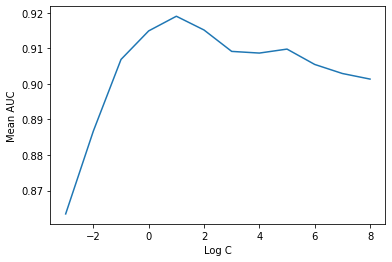

In [ ]:
import sklearn.model_selection as model_selection

# Define inputs for the SVC classifier
n_trials = 25 # Number of bootstrapped samples
svc_log_C_range = np.arange(-3, 9)  # Hyper-parameter regularization penalty range
n_hyper_params = svc_log_C_range.shape[0]

# Train (tune parameters) and validate (tune hyper-parameters)
AUC_matrix = np.zeros([n_hyper_params, n_trials])  # Initiate AUC matrix with hyper-parameters on rows and traials on columns

for svc_log_C_number, svc_log_C in enumerate(svc_log_C_range): # Iterate over the hyper-parameter C
    print(f'Trying Log(C) = {svc_log_C}')

    for trial_number in np.arange(0, n_trials): # Iterate over the trials
        # Create the data split as 80:20 for training_data:validation_data
        X_train, X_val, Y_train, Y_val  = model_selection.train_test_split(train_X, train_Y, train_size=0.8) 
        # Sequence of the variables above is reversed to avoid overwriting of values

        # Train and validate on training data
        svc = svm.SVC(kernel='rbf', C=np.exp(svc_log_C), probability=True) # Define classifier. Probability True computes AUC
        svc.fit(X_train, np.squeeze(Y_train))  # Train and validate
        
        # Predict on validating data
        Y_predicted = svc.predict(X_val)

        # Compute AUC
        AUC_matrix[svc_log_C_number, trial_number] = roc_auc_score(np.squeeze(Y_val), Y_predicted)

# Compute the mean of AUC over the trials for each value of hyper-parameter
mean_AUC = np.mean(AUC_matrix, axis=1)

# Print AUC and hyper-parameters
print('Mean AUC:')
print(mean_AUC)
print(np.exp(svc_log_C))

# Plot AUC vs hyper-parameter
plt.plot(svc_log_C_range, mean_AUC)
plt.xlabel('Log C')
plt.ylabel('Mean AUC')

Obervations:
1. Metric peaks and then decreases indicating a sweet-spot (around log(C)=1) between over-fitting (on the left) and under-fitting (on the right).

### (b) Try different values of gamma (kernel width) for a given regularization penalty

Trying Log gamma = -5
Trying Log gamma = -4
Trying Log gamma = -3
Trying Log gamma = -2
Trying Log gamma = -1
Trying Log gamma = 0
Trying Log gamma = 1
[0.2520004  0.25113045 0.25783549 0.25721722 0.25301911 0.24601933
 0.23348877]
[0.00673795 0.01831564 0.04978707 0.13533528 0.36787944 1.
 2.71828183]


Text(0, 0.5, 'Mean AUC')

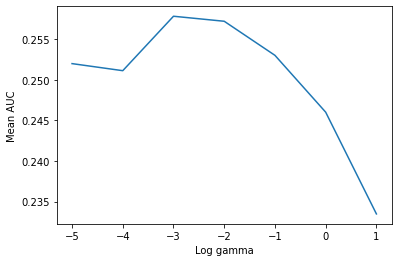

In [ ]:
# Define inputs for the classifier
n_trials = 25 # Number of trials
svc_log_gamma_range = np.arange(-5, 2)  # Hyper-parameter kernel width range
n_hyper_params = svc_log_gamma_range.shape[0]

AUC_matrix = np.zeros([n_hyper_params, n_trials])

for svc_log_gamma_number, svc_log_gamma in enumerate(svc_log_gamma_range):
    print(f'Trying Log gamma = {svc_log_gamma}')
    for trial_number in np.arange(0, n_hyper_params):
        # Split the data
        X_train, X_val, Y_train, Y_val = model_selection.train_test_split(train_X, train_Y, train_size=0.8)

        # Define the classifier
        svc = svm.SVC(kernel='rbf', C=np.exp(1), gamma=np.exp(svc_log_gamma), probability=True)
        
        # Train and validate on train data
        svc.fit(X_train, np.squeeze(Y_train))

        # Prediction on val data
        Y_predicted = svc.predict(X_val)

        # Compute and store AUC
        AUC_matrix[svc_log_gamma_number, trial_number] = roc_auc_score(y_true=np.squeeze(Y_val), y_score=Y_predicted)

# Compute the mean of AUC over different trials for each value of hyper-parameter
mean_AUC = np.mean(AUC_matrix, axis=1)

# Print mean AUC and gamma
print(mean_AUC)
print(np.exp(svc_log_gamma_range))

# Plot mean AUC vs log gamma
plt.plot(svc_log_gamma_range, mean_AUC)
plt.xlabel('Log gamma')
plt.ylabel('Mean AUC')


Observations:
AUC metric peaks, then decreases, indicating a sweet-spot at Log(gamma) = -2, between over-fitting (on the left) and under-fitting (on the right).

Next:
Retrain using all training data and best hyper-parameters, and test.

In [ ]:
# Define classifier
svc = svm.SVC(kernel='rbf', C=np.exp(1), gamma=np.exp(-3), probability=True)

# Train and validate on training data
svc.fit(train_X, np.squeeze(train_Y))

# Predict using the testing data
y_true, y_predicted = test_Y, svc.predict(np.array(test_X))

# Compute and print classification report
print('Test classification report:')
print(classification_report(y_true=y_true, y_pred=y_predicted))

# Print test AUC-ROC
print('Test ROC-AUC: ', roc_auc_score(y_true, y_predicted))


Test classification report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       328
           1       0.91      0.90      0.90       301

    accuracy                           0.91       629
   macro avg       0.91      0.91      0.91       629
weighted avg       0.91      0.91      0.91       629

Test ROC-AUC:  0.9088708370472409


Observation:
1. We had 0.907 AUC in automated cross-validation using GridSearchCV and 0.909 AUC using the boostrapping method. Hence higher ROC-AUC using bootstrapping as it is a bit more rigorous than the automated cross-validation.

# Clustering

Assume that the class labels are not to be used for clustering. We will do the same process we of fitting we did before for clustering now.

Notes:
1. We can not visualize 25 dimensions in clustering so we use 'TSNE' (t-distributed Stochastic Neighbor Embedding), which uses non-linear transformation to bring the data to a lower dimension.
2. 

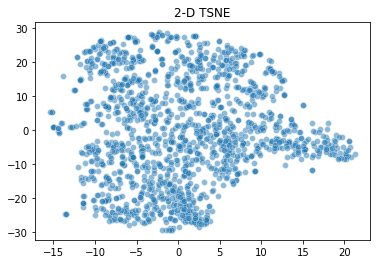

In [ ]:
# Visualize using a low-dimensional embedding such as t-sne

from sklearn.manifold import TSNE

# Define tsne
tsne = TSNE(n_components=2  # Reduces number of dimensions to n_components
            , perplexity=100)  # 

# TSNE fitting
tsne_dims = tsne.fit_transform(np.array(train_X))

# Plot the 2D-TSNE
sns.scatterplot(x=tsne_dims[:, 0], y=tsne_dims[:, 1], alpha=0.5)
plt.title('2-D TSNE')
plt.show()

Observations:
We don't see the clusters properly in this.

## DBSCAN (Clustering algorithm)

In [ ]:
# Lets us try a fancy clustering algorithm - DBSCAN

from sklearn.cluster import DBSCAN

# Define clustering classifier
clustering = DBSCAN(eps=1.5, min_samples=8).fit(train_X)  # eps and min_samples are hyper-parameters

labels = clustering.labels_
unique_labels = set(labels)
n_clusters_ = len()
